# Feature selection:

- Generaly we have many columns in a dataset,in that many columns are not important.

- We need to get the important columns so that we can build our model based on those columns

- This is called feature selection

- Dropping Constant features

- Correlation

- Information gain

- Chi square

- P-value

- Forward selection and Back ward selection

In [10]:
import pandas as pd
import numpy as np

In [11]:
data=pd.DataFrame({"A":[1,2,3,4,5],
                  "B":[100,200,300,400,500],
                  "C":[10,20,30,40,50],
                  "D":[1,1,1,1,1]})

# Note : before apply variance threshold method make sure your data is numerical

In [12]:
data

,A,B,C,D
0,1,100,10,1
1,2,200,20,1
2,3,300,30,1
3,4,400,40,1
4,5,500,50,1


**1.Variance Threshold**

- Feature selector removes all low variance features

- This feature selection algorithm only at the features (input columns)

- Do not apply for target variable

In [13]:
# Import the package
# save in a variable
# apply fit and transform

from sklearn.feature_selection import VarianceThreshold
variance_threshold=VarianceThreshold(threshold=0)
# if variance of any feature is zero then drop the feature
variance_threshold.fit(data)

VarianceThreshold(threshold=0)

In [14]:
variance_threshold.get_support()
# True:The feature have variance morethan threshold value
# False:the feature have variance lessthan or equal to threshold value

array([ True,  True,  True, False])

In [15]:
variance_threshold.get_params()

{'threshold': 0}

In [16]:
data.columns[variance_threshold.get_support()]

Index(['A', 'B', 'C'], dtype='object')

In [17]:
new_data=data[data.columns[variance_threshold.get_support()]]
new_data

,A,B,C
0,1,100,10
1,2,200,20
2,3,300,30
3,4,400,40
4,5,500,50


# Method:2

## Information gain

Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in and . Both methods are based on the idea originally proposed in.


skikit-learn.org/stable/module/

In [18]:
# Suppose If I apply MI between input and output variables
# Which input variable has more MI that is my important feature
# MI : dependency between two variables
# Here Two variables means one is input ans another one is output

I(X:Y)= H(X)-H(X/Y)

where I(X:Y) is the Mutual information for X and Y

H(X) is the entropy of X

H(X/Y) is Conditional entropy for X given Y

The results shown in the form of bits

In [19]:
df=pd.read_csv('/Users/sheelendersharma1/Desktop/data sciece/winequality_red.csv')
df.head()

# quality is traget variable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.shape

(1599, 12)

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
# Identify  MI between input and output
# we need to seperate input and output column data
# Input column data is X
# output column data is y

In [24]:
Y=df['quality'] # output data
X=df.drop('quality',axis=1)

In [25]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,Y)
MI

array([0.07101002, 0.11289685, 0.06554975, 0.02568479, 0.04577188,
       0.0363696 , 0.08452964, 0.08964324, 0.02222256, 0.08599752,
       0.19747659])

In [27]:
MI=pd.Series(MI)
MI.index=X.columns
MI.sort_values(ascending=False)

alcohol                 0.197477
volatile acidity        0.112897
density                 0.089643
sulphates               0.085998
total sulfur dioxide    0.084530
fixed acidity           0.071010
citric acid             0.065550
chlorides               0.045772
free sulfur dioxide     0.036370
residual sugar          0.025685
pH                      0.022223
dtype: float64

<AxesSubplot:>

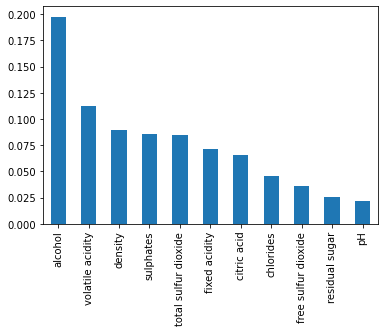

In [28]:
MI.sort_values(ascending=False).plot.bar()


In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
# select top 5 
top_5=SelectKBest(mutual_info_classif,k=5)
top_5.fit(X,Y)
top_5.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [31]:
a=X.columns[top_5.get_support()]
pd.Series(a)


0        volatile acidity
1    total sulfur dioxide
2                 density
3               sulphates
4                 alcohol
dtype: object

## MIR

In [32]:
from sklearn.feature_selection import mutual_info_regression
MIR=mutual_info_regression(X,Y)
MIR

array([0.03092648, 0.11548014, 0.05964048, 0.02159994, 0.04247047,
       0.01220184, 0.10442491, 0.08002632, 0.02458391, 0.13079566,
       0.16958471])

In [33]:
MIR=pd.Series(MIR)
MIR.index=X.columns
MIR.sort_values(ascending=False)

alcohol                 0.169585
sulphates               0.130796
volatile acidity        0.115480
total sulfur dioxide    0.104425
density                 0.080026
citric acid             0.059640
chlorides               0.042470
fixed acidity           0.030926
pH                      0.024584
residual sugar          0.021600
free sulfur dioxide     0.012202
dtype: float64

<AxesSubplot:>

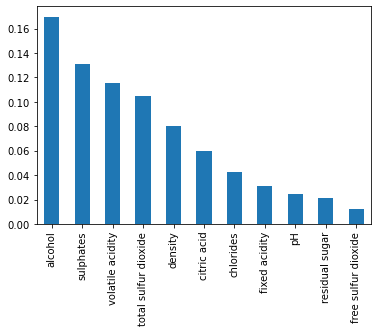

In [34]:
MIR.sort_values(ascending=False).plot.bar()

In [35]:
# select top 5 
top_5=SelectKBest(mutual_info_regression,k=5)
top_5.fit(X,Y)
top_5.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [36]:

# You need to check above analysis for any classification data
